In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
animals = pd.read_csv(r'C:\Users\SAIRAM\Desktop\Simplilearn_Practice\Machine Learning\Classification\horse.csv')

## Understand the data stats

In [3]:
animals.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
animals.shape

(299, 28)

In [5]:
animals.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [6]:
animals.iloc[0]

surgery                             no
age                              adult
hospital_number                 530101
rectal_temp                       38.5
pulse                             66.0
respiratory_rate                  28.0
temp_of_extremities               cool
peripheral_pulse               reduced
mucous_membrane                    NaN
capillary_refill_time       more_3_sec
pain                      extreme_pain
peristalsis                     absent
abdominal_distention            severe
nasogastric_tube                   NaN
nasogastric_reflux                 NaN
nasogastric_reflux_ph              NaN
rectal_exam_feces            decreased
abdomen                  distend_large
packed_cell_volume                45.0
total_protein                      8.4
abdomo_appearance                  NaN
abdomo_protein                     NaN
outcome                           died
surgical_lesion                     no
lesion_1                         11300
lesion_2                 

In [7]:
print(animals['outcome'].unique())
print(animals['outcome'].value_counts())

['died' 'euthanized' 'lived']
lived         178
died           77
euthanized     44
Name: outcome, dtype: int64


In [8]:
target = animals['outcome']
animals = animals.drop(['outcome'], axis=1)
print(animals.shape, target.shape)

(299, 27) (299,)


In [9]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [10]:
missing_perc = animals.isnull().mean()
print(missing_perc)

surgery                  0.000000
age                      0.000000
hospital_number          0.000000
rectal_temp              0.200669
pulse                    0.080268
respiratory_rate         0.193980
temp_of_extremities      0.187291
peripheral_pulse         0.230769
mucous_membrane          0.157191
capillary_refill_time    0.107023
pain                     0.183946
peristalsis              0.147157
abdominal_distention     0.187291
nasogastric_tube         0.347826
nasogastric_reflux       0.354515
nasogastric_reflux_ph    0.822742
rectal_exam_feces        0.341137
abdomen                  0.394649
packed_cell_volume       0.096990
total_protein            0.110368
abdomo_appearance        0.551839
abdomo_protein           0.662207
surgical_lesion          0.000000
lesion_1                 0.000000
lesion_2                 0.000000
lesion_3                 0.000000
cp_data                  0.000000
dtype: float64


## Droping the features with > 30% missing values

In [11]:
list(missing_perc[missing_perc > 0.3].index)

['nasogastric_tube',
 'nasogastric_reflux',
 'nasogastric_reflux_ph',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'abdomo_protein']

In [12]:
animals = animals.drop(list(missing_perc[missing_perc > 0.3].index), axis=1)
animals.shape

(299, 20)

In [13]:
animals.isnull().mean()

surgery                  0.000000
age                      0.000000
hospital_number          0.000000
rectal_temp              0.200669
pulse                    0.080268
respiratory_rate         0.193980
temp_of_extremities      0.187291
peripheral_pulse         0.230769
mucous_membrane          0.157191
capillary_refill_time    0.107023
pain                     0.183946
peristalsis              0.147157
abdominal_distention     0.187291
packed_cell_volume       0.096990
total_protein            0.110368
surgical_lesion          0.000000
lesion_1                 0.000000
lesion_2                 0.000000
lesion_3                 0.000000
cp_data                  0.000000
dtype: float64

## Treat the missing values

In [14]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  packed_cell_volume     270 non-null    float64
 14  total_protein          266 non-null    float64
 15  surgic

#### rectal_temp            

In [15]:
animals[pd.isnull(animals['rectal_temp'])]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,depressed,hypomotile,slight,NaN,NaN,no,0,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,NaN,absent,slight,44.0,8.3,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,severe_pain,absent,severe,38.0,6.2,yes,3205,0,0,no
16,yes,young,5301219,NaN,128.0,36.0,cool,reduced,pale_cyanotic,more_3_sec,severe_pain,absent,moderate,53.0,7.8,no,1400,0,0,yes
28,yes,adult,5279442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,4300,0,0,no
34,yes,adult,529796,NaN,100.0,30.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,severe,52.0,6.6,yes,1124,0,0,no
35,no,adult,528812,NaN,104.0,24.0,cold,reduced,pale_pink,more_3_sec,severe_pain,absent,moderate,73.0,8.4,yes,7111,0,0,no
40,yes,adult,529498,NaN,88.0,NaN,cool,reduced,dark_cyanotic,more_3_sec,extreme_pain,hypomotile,moderate,63.0,6.5,yes,4205,0,0,no
43,yes,adult,534069,NaN,120.0,NaN,cool,absent,pale_cyanotic,less_3_sec,severe_pain,absent,severe,52.0,67.0,yes,3205,0,0,no
45,no,adult,529827,NaN,120.0,NaN,cold,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,severe,60.0,6.5,yes,3205,0,0,no


In [16]:
animals['age'].value_counts()

adult    275
young     24
Name: age, dtype: int64

In [17]:
#rectal_temp
print('rectal_temp')
print(animals[animals['age'] == 'adult']['rectal_temp'].mean())
print(animals[animals['age'] == 'young']['rectal_temp'].mean())
print('\n')

#pulse
print('pulse')
print(animals[animals['age'] == 'adult']['pulse'].mean())
print(animals[animals['age'] == 'young']['pulse'].mean())
print('\n')

#respiratory_rate
print('respiratory_rate')
print(animals[animals['age'] == 'adult']['respiratory_rate'].mean())
print(animals[animals['age'] == 'young']['respiratory_rate'].mean())
print('\n')

#packed_cell_volume 
print('packed_cell_volume')
print(animals[animals['age'] == 'adult']['packed_cell_volume'].mean())
print(animals[animals['age'] == 'young']['packed_cell_volume'].mean())
print('\n')

#total_protein
print('total_protein')
print(animals[animals['age'] == 'adult']['total_protein'].mean())
print(animals[animals['age'] == 'young']['total_protein'].mean())
print('\n')


rectal_temp
38.12511415525117
38.644999999999996


pulse
67.53359683794466
123.36363636363636


respiratory_rate
28.27601809954751
54.6


packed_cell_volume
46.77732793522267
41.26086956521739


total_protein
25.24303278688525
13.531818181818181




<b>
rectal_temp        ==> can use mean directly ==> no need of grouped mean as there is no much variations <br>
pulse              ==> use grouped mean based on age ==> adult: 67 and yound ==> 123 <br>
respiratory_rate   ==> use grouped mean based on age ==> adult: 28 and yound ==> 54 <br>
packed_cell_volume ==> use grouped mean based on age ==> adult: 46 and yound ==> 41 <br>
total_protein      ==> use grouped mean based on age ==> adult: 25 and yound ==> 13 <br>

In [18]:
int(animals['rectal_temp'].mean())

38

In [19]:
#rectal_temp
animals['rectal_temp'] = animals['rectal_temp'].fillna(int(animals['rectal_temp'].mean()))

In [20]:
def fill_missing(cols):
    age     = cols[0]
    val     = cols[1]
    colname = cols[2]
    
    if pd.isnull(val):
        return animals[animals['age'] == age][colname].mean()
    else:
        return val

In [21]:
#pulse
animals['temp_col_name'] = 'pulse'
animals['pulse'] = animals[['age', 'pulse', 'temp_col_name']].apply(fill_missing, axis=1)

In [22]:
#respiratory_rate
animals['temp_col_name'] = 'respiratory_rate'
animals['respiratory_rate'] = animals[['age', 'respiratory_rate', 'temp_col_name']].apply(fill_missing, axis=1)

In [23]:
#packed_cell_volume
animals['temp_col_name'] = 'packed_cell_volume'
animals['packed_cell_volume'] = animals[['age', 'packed_cell_volume', 'temp_col_name']].apply(fill_missing, axis=1)

In [24]:
#total_protein
animals['temp_col_name'] = 'total_protein'
animals['total_protein'] = animals[['age', 'total_protein', 'temp_col_name']].apply(fill_missing, axis=1)

In [25]:
animals = animals.drop('temp_col_name', axis=1)

In [26]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  packed_cell_volume     299 non-null    float64
 14  total_protein          299 non-null    float64
 15  surgic

Below are the objects that are having missing values <br>
 6   temp_of_extremities    243 non-null    object <br>
 7   peripheral_pulse       230 non-null    object <br>
 8   mucous_membrane        252 non-null    object <br>
 9   capillary_refill_time  267 non-null    object <br>
 10  pain                   244 non-null    object <br>
 11  peristalsis            255 non-null    object <br>
 12  abdominal_distention   243 non-null    object 

In [27]:
#temp_of_extremities
print('temp_of_extremities')
print('Mode of temp of extemeties is ', animals['temp_of_extremities'].mode()[0])
print(animals[animals['age'] == 'adult']['temp_of_extremities'].mode()[0])
print(animals[animals['age'] == 'young']['temp_of_extremities'].mode()[0])
print('\n')


#peripheral_pulse
print('peripheral_pulse')
print('Mode of temp of peripheral_pulse is ', animals['peripheral_pulse'].mode()[0])
print(animals[animals['age'] == 'adult']['peripheral_pulse'].mode())
print(animals[animals['age'] == 'young']['peripheral_pulse'].mode())
print('\n')

#mucous_membrane
print('mucous_membrane')
print('Mode of temp of mucous_membrane is ', animals['mucous_membrane'].mode()[0])
print(animals[animals['age'] == 'adult']['mucous_membrane'].mode())
print(animals[animals['age'] == 'young']['mucous_membrane'].mode())
print('\n')

#capillary_refill_time
print('capillary_refill_time')
print('Mode of temp of capillary_refill_time is ', animals['capillary_refill_time'].mode()[0])
print(animals[animals['age'] == 'adult']['capillary_refill_time'].mode())
print(animals[animals['age'] == 'young']['capillary_refill_time'].mode())
print('\n')

temp_of_extremities
Mode of temp of extemeties is  cool
cool
cool


peripheral_pulse
Mode of temp of peripheral_pulse is  normal
0    normal
dtype: object
0    reduced
dtype: object


mucous_membrane
Mode of temp of mucous_membrane is  normal_pink
0    normal_pink
dtype: object
0    bright_pink
dtype: object


capillary_refill_time
Mode of temp of capillary_refill_time is  less_3_sec
0    less_3_sec
dtype: object
0    less_3_sec
dtype: object




With above observations, for age == young, value of missing feature is not always the same the mode of the complete feature - so we will fill the missing values based on grouped mode value on basis of the feature age

In [28]:
def fill_missing_objects(cols):
    age      = cols[0]
    val      = cols[1]
    col_name = cols[2]
    
    if pd.isnull(val):
        return animals[animals['age'] == age][col_name].mode()[0]
    else:
        return val

In [29]:
animals['temp_of_extremities'].head()

0      cool
1       NaN
2    normal
3      cold
4       NaN
Name: temp_of_extremities, dtype: object

In [30]:
#temp_of_extremities
animals['temp_col_name'] = 'temp_of_extremities'
animals['temp_of_extremities'] = animals[['age', 'temp_of_extremities', 'temp_col_name']].apply(fill_missing_objects, axis=1)

### Loop to iterate across the features in concern due to missing value and fill them with grouped mode

In [31]:
col_list = ['peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention']

for col in col_list:
    print(col)
    animals['temp_col_name'] = col
    animals[col] = animals[['age', col, 'temp_col_name']].apply(fill_missing_objects, axis=1)

peripheral_pulse
mucous_membrane
capillary_refill_time
pain
peristalsis
abdominal_distention


In [32]:
animals.isnull().mean()

surgery                  0.0
age                      0.0
hospital_number          0.0
rectal_temp              0.0
pulse                    0.0
respiratory_rate         0.0
temp_of_extremities      0.0
peripheral_pulse         0.0
mucous_membrane          0.0
capillary_refill_time    0.0
pain                     0.0
peristalsis              0.0
abdominal_distention     0.0
packed_cell_volume       0.0
total_protein            0.0
surgical_lesion          0.0
lesion_1                 0.0
lesion_2                 0.0
lesion_3                 0.0
cp_data                  0.0
temp_col_name            0.0
dtype: float64

## Feature selection

In [33]:
animals['hospital_number'].nunique()
print(animals['hospital_number'].head())

#Looks to be continous ID like numbers - drop the feature - not a good predictor
animals = animals.drop('hospital_number', axis=1)

0     530101
1     534817
2     530334
3    5290409
4     530255
Name: hospital_number, dtype: int64


In [34]:
#selecting the columns that are object types
animals.select_dtypes('object').columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'surgical_lesion', 'cp_data', 'temp_col_name'],
      dtype='object')

In [35]:
cat_features = list(animals.select_dtypes('object').columns)
print(cat_features)

['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'surgical_lesion', 'cp_data', 'temp_col_name']


In [36]:
animals = pd.get_dummies(animals, columns=cat_features)
print(animals.shape)
animals.head()

(299, 47)


,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3,surgery_no,surgery_yes,...,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes,temp_col_name_abdominal_distention
0,38.5,66.0,28.0,45.0,8.4,11300,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
1,39.2,88.0,20.0,50.0,85.0,2208,0,0,0,1,...,0,0,0,0,1,1,0,1,0,1
2,38.3,40.0,24.0,33.0,6.7,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,1
3,39.1,164.0,84.0,48.0,7.2,2208,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1
4,37.3,104.0,35.0,74.0,7.4,4300,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1


In [37]:
animals.columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume',
       'total_protein', 'lesion_1', 'lesion_2', 'lesion_3', 'surgery_no',
       'surgery_yes', 'age_adult', 'age_young', 'temp_of_extremities_cold',
       'temp_of_extremities_cool', 'temp_of_extremities_normal',
       'temp_of_extremities_warm', 'peripheral_pulse_absent',
       'peripheral_pulse_increased', 'peripheral_pulse_normal',
       'peripheral_pulse_reduced', 'mucous_membrane_bright_pink',
       'mucous_membrane_bright_red', 'mucous_membrane_dark_cyanotic',
       'mucous_membrane_normal_pink', 'mucous_membrane_pale_cyanotic',
       'mucous_membrane_pale_pink', 'capillary_refill_time_3',
       'capillary_refill_time_less_3_sec', 'capillary_refill_time_more_3_sec',
       'pain_alert', 'pain_depressed', 'pain_extreme_pain', 'pain_mild_pain',
       'pain_severe_pain', 'peristalsis_absent', 'peristalsis_hypermotile',
       'peristalsis_hypomotile', 'peristalsis_normal',
       'abdominal_distention

In [38]:
#Encode the target variable - Use Label encoding - as we can have only one dimension in the target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = animals
Y = target
print(Y.shape, Y[0:5])

le = LabelEncoder()
Y = le.fit_transform(Y)
print('Encoding of Y is done', Y.shape, Y[0:5])

(299,) 0          died
1    euthanized
2         lived
3          died
4          died
Name: outcome, dtype: object
Encoding of Y is done (299,) [0 1 2 0 0]


<b > died --> 0 <br>
euthanized --> 1 <br>
lived --> 2 <br> <b>   

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239, 47) (60, 47) (239,) (60,)


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [41]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) 

DecisionTreeClassifier()

In [42]:
classifier.score(X_train, y_train)

1.0

In [43]:
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.5666666666666667

In [44]:
#accuracy score using metrics package
metrics.accuracy_score(y_test, y_pred)

0.5666666666666667

#### Overfitting case - Training accuracy way higher than test accuracy

###### Use Gridsearch to check on combinations for min sample leaf and max depth to avoid overfitting

In [45]:
param_grid = {
    'max_depth'        : [1,2,3,4,5,None],
    'min_samples_leaf' : [1,2,3,4,5]
}

In [46]:
gs = GridSearchCV(classifier, param_grid, cv=3, verbose=2)
#cv=3 - cross check every combination three times
#verbose=2 - logging mechanism

In [47]:
gs.fit(X, Y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=1, min_sa

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             verbose=2)

In [48]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 2}

In [49]:
gs.best_score_

0.6622222222222223

In [50]:
classifier.feature_importances_

array([0.04915398, 0.13734703, 0.04959858, 0.23923478, 0.16604625,
       0.09164829, 0.        , 0.        , 0.03027852, 0.        ,
       0.        , 0.        , 0.        , 0.00965423, 0.        ,
       0.        , 0.        , 0.01244705, 0.        , 0.04271995,
       0.        , 0.01464924, 0.01899611, 0.02086002, 0.        ,
       0.        , 0.        , 0.02051523, 0.        , 0.        ,
       0.01448134, 0.        , 0.00724067, 0.        , 0.        ,
       0.        , 0.01396415, 0.01123232, 0.00965423, 0.00965423,
       0.        , 0.        , 0.01976282, 0.        , 0.010861  ,
       0.        , 0.        ])

In [51]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=1, min_sa

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             verbose=2)

In [52]:
gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 3}

In [53]:
gs.best_score_

0.6611286919831224

Using regularization parameters, we are able to get only 65% (earlier it was 55%) ==> Still the case of overfitting

In [54]:
classifier.feature_importances_

array([0.04915398, 0.13734703, 0.04959858, 0.23923478, 0.16604625,
       0.09164829, 0.        , 0.        , 0.03027852, 0.        ,
       0.        , 0.        , 0.        , 0.00965423, 0.        ,
       0.        , 0.        , 0.01244705, 0.        , 0.04271995,
       0.        , 0.01464924, 0.01899611, 0.02086002, 0.        ,
       0.        , 0.        , 0.02051523, 0.        , 0.        ,
       0.01448134, 0.        , 0.00724067, 0.        , 0.        ,
       0.        , 0.01396415, 0.01123232, 0.00965423, 0.00965423,
       0.        , 0.        , 0.01976282, 0.        , 0.010861  ,
       0.        , 0.        ])

In [55]:
X.columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume',
       'total_protein', 'lesion_1', 'lesion_2', 'lesion_3', 'surgery_no',
       'surgery_yes', 'age_adult', 'age_young', 'temp_of_extremities_cold',
       'temp_of_extremities_cool', 'temp_of_extremities_normal',
       'temp_of_extremities_warm', 'peripheral_pulse_absent',
       'peripheral_pulse_increased', 'peripheral_pulse_normal',
       'peripheral_pulse_reduced', 'mucous_membrane_bright_pink',
       'mucous_membrane_bright_red', 'mucous_membrane_dark_cyanotic',
       'mucous_membrane_normal_pink', 'mucous_membrane_pale_cyanotic',
       'mucous_membrane_pale_pink', 'capillary_refill_time_3',
       'capillary_refill_time_less_3_sec', 'capillary_refill_time_more_3_sec',
       'pain_alert', 'pain_depressed', 'pain_extreme_pain', 'pain_mild_pain',
       'pain_severe_pain', 'peristalsis_absent', 'peristalsis_hypermotile',
       'peristalsis_hypomotile', 'peristalsis_normal',
       'abdominal_distention

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


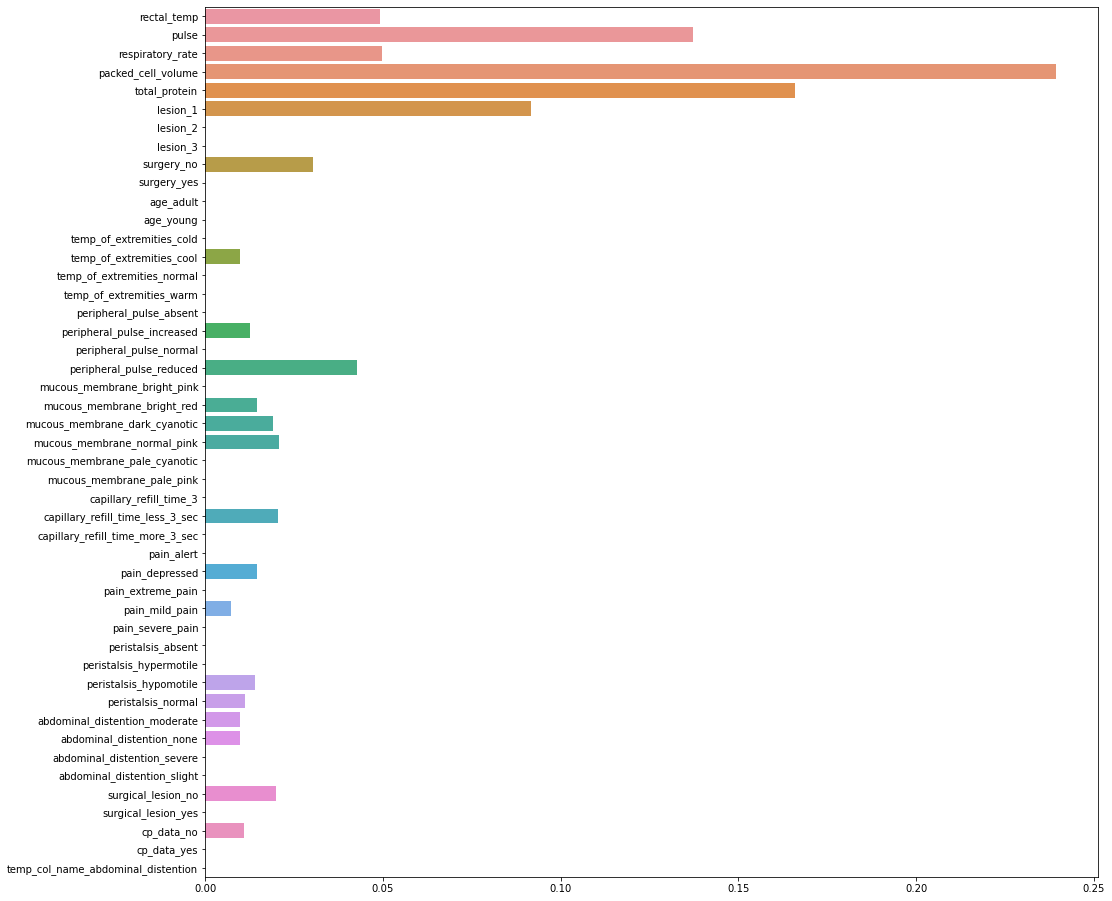

In [56]:
import seaborn as sns
plt.figure(figsize=(16,16))
sns.barplot(classifier.feature_importances_, X.columns)
plt.show()

#### Above feature importance is based on ENTROPY (degree of randomness)

### Random Forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
rf.score(X_train, y_train)

1.0

In [60]:
rf.score(X_test, y_test)

0.7166666666666667

In [61]:
rf_y_pred = rf.predict(X_test)
rf_y_pred[0:10]

array([0, 2, 0, 2, 0, 2, 0, 0, 2, 2])

In [62]:
metrics.accuracy_score(y_test, rf_y_pred)

0.7166666666666667

In [89]:
param_grid = {
    
    'n_estimators'     : [100,150,200,250],
    'max_depth'        : [1,2,3,4,5,None],
    'min_samples_leaf' : [1,2,3,4,5],
    'random_state'     : [17]
}

In [90]:
gs = GridSearchCV(rf, param_grid, verbose=2, cv=3)

In [99]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=1, n_estimators=250, random_state=

[CV] END max_depth=2, min_samples_leaf=3, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=3, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=3, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=3, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=3, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=3, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=4

[CV] END max_depth=3, min_samples_leaf=5, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, n_estimators=250, random_state=17; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=1, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1

[CV] END max_depth=5, min_samples_leaf=2, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3

[CV] END max_depth=None, min_samples_leaf=4, n_estimators=200, random_state=17; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, n_estimators=250, random_state=17; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=100, random_state=17; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=150, random_state=17; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=150, random_state=17; total time=   0.0s
[CV] END m

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=17),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250],
                         'random_state': [17]},
             verbose=2)

In [102]:
gs.best_score_

0.7407700421940927

In [103]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'n_estimators': 250,
 'random_state': 17}

In [104]:
rf = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, n_estimators = 250, random_state=17)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=17)

In [105]:
print('train accuracy:', rf.score(X, Y))
print('train accuracy:', rf.score(X_train, y_train))
print('test accuracy:', rf.score(X_test, y_test))

train accuracy: 0.9498327759197325
train accuracy: 1.0
test accuracy: 0.75


In [106]:
rf.feature_importances_

array([0.05824019, 0.09529999, 0.05233227, 0.11138753, 0.10184954,
       0.09737968, 0.0037437 , 0.        , 0.0195431 , 0.01714431,
       0.0073281 , 0.00702639, 0.00721323, 0.01822314, 0.01162793,
       0.00514483, 0.00411467, 0.00274997, 0.02253892, 0.01862661,
       0.00548848, 0.0174285 , 0.00950631, 0.01611121, 0.01326063,
       0.01003999, 0.0005074 , 0.01831778, 0.0214983 , 0.00386194,
       0.00998886, 0.01451083, 0.02142272, 0.01777713, 0.01698575,
       0.00388622, 0.0118753 , 0.00373518, 0.01319772, 0.01460394,
       0.01107186, 0.01063351, 0.02217444, 0.02065958, 0.01596548,
       0.01397686, 0.        ])

In [107]:
X.columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume',
       'total_protein', 'lesion_1', 'lesion_2', 'lesion_3', 'surgery_no',
       'surgery_yes', 'age_adult', 'age_young', 'temp_of_extremities_cold',
       'temp_of_extremities_cool', 'temp_of_extremities_normal',
       'temp_of_extremities_warm', 'peripheral_pulse_absent',
       'peripheral_pulse_increased', 'peripheral_pulse_normal',
       'peripheral_pulse_reduced', 'mucous_membrane_bright_pink',
       'mucous_membrane_bright_red', 'mucous_membrane_dark_cyanotic',
       'mucous_membrane_normal_pink', 'mucous_membrane_pale_cyanotic',
       'mucous_membrane_pale_pink', 'capillary_refill_time_3',
       'capillary_refill_time_less_3_sec', 'capillary_refill_time_more_3_sec',
       'pain_alert', 'pain_depressed', 'pain_extreme_pain', 'pain_mild_pain',
       'pain_severe_pain', 'peristalsis_absent', 'peristalsis_hypermotile',
       'peristalsis_hypomotile', 'peristalsis_normal',
       'abdominal_distention

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


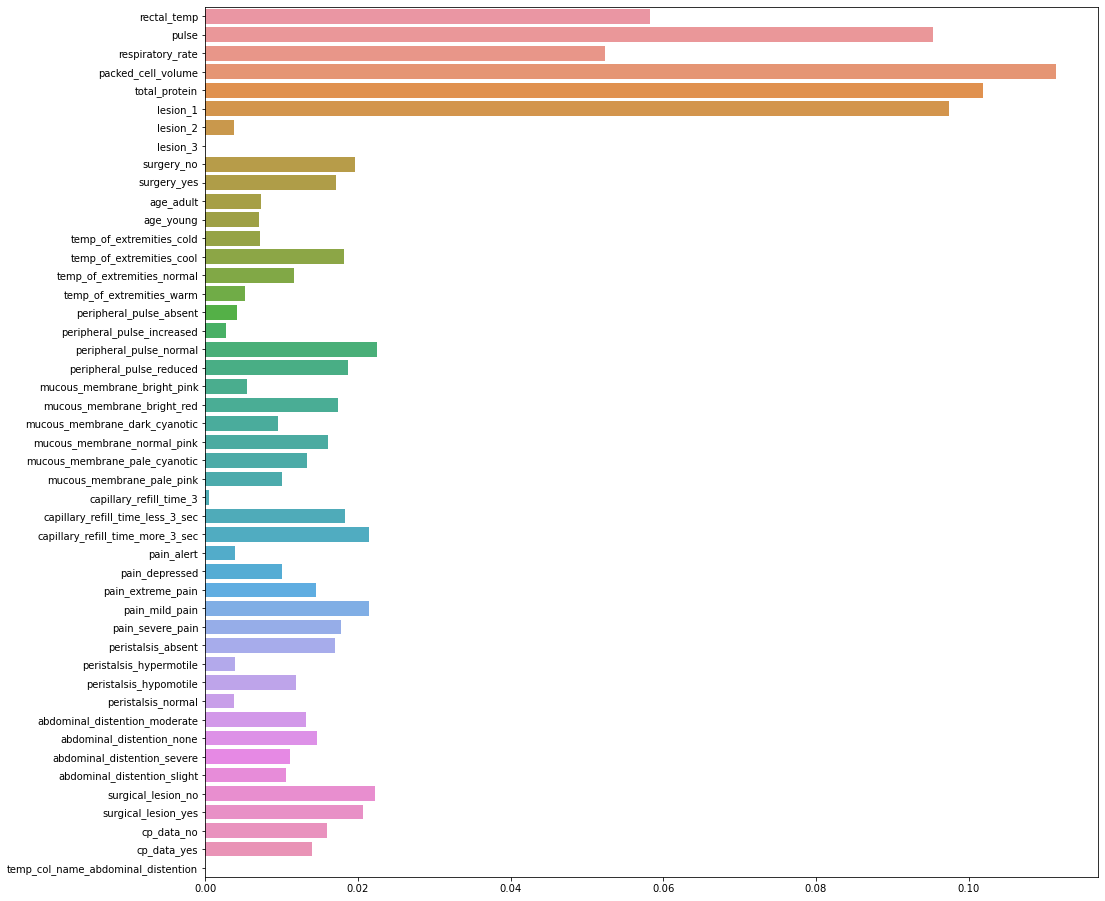

In [108]:
plt.figure(figsize=(16,16))
sns.barplot(rf.feature_importances_ ,X.columns)
plt.show()

## K-Nearest Neighbors classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier()

In [84]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
knn.score(X_train, y_train)

0.7489539748953975

In [86]:
knn.score(X_test, y_test)

0.6

In [109]:
neighbors = [i for i in range(2,20)]
print(neighbors)
accuracies = []

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [110]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))
    

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

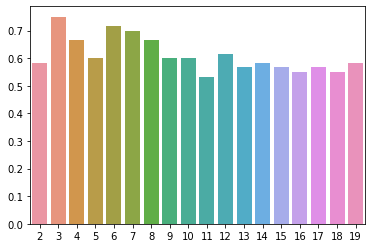

In [112]:
sns.barplot(neighbors, accuracies)

## K = 3 ==> Gives higher test accuracy

In [113]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Train accuracy:', knn.score(X_train, y_train))
print('Test accuracy :', knn.score(X_test, y_test))

Train accuracy: 0.8075313807531381
Test accuracy : 0.75


## SVM

In [115]:
from sklearn.svm import SVC

In [116]:
clf = SVC()

In [117]:
clf.fit(X_train, y_train)

SVC()

In [118]:
clf.score(X_train, y_train)

0.5815899581589958

In [119]:
clf.score(X_test, y_test)

0.65

In [121]:
param_grid = {
    
    'C' : [0.01, 0.1, 1, 5, 10],
    'gamma' : [0.0001, 0.00001, 0.000001, 0.0000001]
    
}

In [122]:
gs = GridSearchCV(clf, param_grid, verbose=2, cv=3)

In [123]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ...............................C=0.01, gamma=0.0001; total time=   0.0s
[CV] END ...............................C=0.01, gamma=0.0001; total time=   0.0s
[CV] END ...............................C=0.01, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-05; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-05; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-05; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-06; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-06; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-06; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-07; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-07; total time=   0.0s
[CV] END ................................C=0.01,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'gamma': [0.0001, 1e-05, 1e-06, 1e-07]},
             verbose=2)

In [124]:
gs.best_params_

{'C': 10, 'gamma': 1e-05}

In [125]:
gs.best_score_

0.6815928270042194

## Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB

In [127]:
nb = GaussianNB()

In [128]:
nb.fit(X_train, y_train)

GaussianNB()

In [129]:
nb.score(X_train, y_train)

0.6778242677824268

In [130]:
nb.score(X_test, y_test)

0.65

Gaussian is for continous inputs - but just tested out here <br>
Bernoulli NB is for Binary classification (but inputs can be of mix of categorical and continous features)


## Ensemble Learning

In [132]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

In [133]:
adaclf = AdaBoostClassifier(random_state=17)
adaclf.fit(X_train, y_train)

AdaBoostClassifier(random_state=17)

In [136]:
print('Train accuracy is {}'.format(adaclf.score(X_train, y_train)))
print('Test  accuracy is {}'.format(adaclf.score(X_test, y_test)))

Train accuracy is 0.7573221757322176
Test  accuracy is 0.7166666666666667


In [141]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=17)

In [142]:
adaclf = AdaBoostClassifier(random_state=17)
results = model_selection.cross_val_score(adaclf, X, Y, cv=kfold)

In [145]:
print('Average test score for k folds is {}'.format(results.mean()))

Average test score for k folds is 0.655287356321839


In [151]:
from xgboost import XGBClassifier
from sklearn import model_selection

In [153]:
xgbclf = XGBClassifier()
xgbclf.fit(X_train, y_train)
print('Train accuracy is {}'.format(xgbclf.score(X_train, y_train)))
print('Test  accuracy is {}'.format(xgbclf.score(X_test, y_test)))

C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:38:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy is 1.0
Test  accuracy is 0.7166666666666667


In [154]:
kfold = model_selection.KFold(n_splits=10, random_state=17, shuffle=True)
xgbclf = XGBClassifier()
xgb_results = model_selection.cross_val_score(xgbclf, X, Y, cv=kfold)
print(xgb_results)
print(xgb_results.mean())

C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:40:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:40:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:40:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:40:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:40:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:40:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:40:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:40:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:40:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:40:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8        0.8        0.66666667 0.83333333 0.6        0.73333333
 0.7        0.6        0.73333333 0.62068966]
0.708735632183908

C:\Users\SAIRAM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<b> XGBOOST = 70.8%  <br>
adaboost = 65.5%  <br>
Gaussian NB = 65% <br>
SVM = 68.15% <br>
KNN = 75%  <br>
RF = 75% <br>
Decision Tree = 66.1% </b>

## Save the final model ::: RF

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
rf = RandomForestClassifier()

In [159]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=17)
rf_results = model_selection.cross_val_score(rf, X, Y, cv=kfold)
print(rf_results.mean())

0.712183908045977


In [170]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [171]:
import pickle

In [172]:
#Save the final model
with open('rf_classifier.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [173]:
#Load the saved model
with open('rf_classifier.pkl', 'rb') as f:
    saved_model = pickle.load(f)

In [175]:
saved_model.score(X_test, y_test)

0.7166666666666667